Прогноз погоды позволяет людям не только планировать свое время, но и заниматься масштабными делами, такими как посев култур, строительство и др. Именно поэтому я выбрал <br>
<a href="https://www.kaggle.com/jsphyg/weather-dataset-rattle-package" >dataset</a><br>
в котором описана погода <br>
Целевая функция (RainTomorrow) показывает, будет ли завтра дождь или нет исходя из начальных условий сегодня. 

In [12]:
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell  #to run all statements in cell, not only the last
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

<h3>
 1-4.Поиск и выбор набора данных для построения моделей машинного обучения.<br>
Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.<br>
Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных.<br>
Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.<h3>

In [13]:
data = pd.read_csv('C:\\Users\\dimag\\Desktop\\Mash_learning\\course\\weatherAUS.csv')
#RISK_MM удаляем для проведения обучения (совет создателя датасета).<br>
data = data.drop(['RISK_MM'], axis=1)
data.head(10)
data.shape #Размер данных
data.isnull().sum() #Проверим нулевые значения
data.describe() # Основные статистические характеристки набора данных
data["RainTomorrow"].unique() #Проверяем значения целевого признака

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


(142193, 23)

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


array(['No', 'Yes'], dtype=object)

In [14]:
#1)Удалим колонки Evaporation, Sunshine, Cloud9am, Cloud3pm так как в них более 40 процентов пропусков
#2)Удалим колонки Date, Location, так как нам не нужны дата и регион
data = data.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
#Попробуем исключить все строки с пропусками, посмотрим, что из этого получится.
data1 = data.dropna(axis=0, how='any')
(data1.shape, data.shape)


((112925, 17), (142193, 17))

<h5>Такой датасет нас устривает<h5>

In [15]:
data=data1
#Для большей точности удалим и аутлайнеров
from scipy import stats
z = np.abs(stats.zscore(data._get_numeric_data()))
print(z)
data= data[(z < 3).all(axis=1)]
data.shape
data.head()

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]


(107868, 17)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [16]:
#Теперь необходимо разобраться с категориальными колонками. Заменим их порядковым номером(целыми числами)
le = LabelEncoder()
le.fit(data.WindGustDir)
le.transform(data.WindGustDir)
data['WindGustDir']=le.transform(data.WindGustDir)

le.fit(data.WindDir3pm)
le.transform(data.WindDir3pm)
data['WindDir3pm']=le.transform(data.WindDir3pm)

le.fit(data.WindDir9am)
le.transform(data.WindDir9am)
data['WindDir9am']=le.transform(data.WindDir9am)

le.fit(data.RainToday)
le.transform(data.RainToday)
data['RainToday']=le.transform(data.RainToday)

le.fit(data.RainTomorrow)
le.transform(data.RainTomorrow)
data['RainTomorrow']=le.transform(data.RainTomorrow)

data.head()
#И затем сразу отмасштабируем наши данные. Вспомогательные признаки в данном случае не нужны
print('Масштабируем наши данные')
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)
data.iloc[4:10]

LabelEncoder()

array([13, 14, 15, ...,  6,  3,  9])

LabelEncoder()

array([14, 15, 15, ...,  3, 14,  3])

LabelEncoder()

array([13,  6, 13, ...,  9,  9, 10])

LabelEncoder()

array([0, 0, 0, ..., 0, 0, 0])

LabelEncoder()

array([0, 0, 0, ..., 0, 0, 0])

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


Масштабируем наши данные


MinMaxScaler(copy=True, feature_range=(0, 1))

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,0.628342,0.696296,0.035714,0.866667,0.465753,0.066667,0.466667,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,0.502660,0.672589,0.0,0.0
5,0.550802,0.632099,0.007143,0.933333,0.671233,0.866667,0.866667,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,0.577128,0.652284,0.0,0.0
6,0.542781,0.516049,0.000000,0.866667,0.589041,0.800000,0.866667,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,0.510638,0.543147,0.0,0.0
7,0.366310,0.558025,0.000000,0.866667,0.383562,0.666667,0.866667,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,0.462766,0.565990,0.0,0.0
8,0.419786,0.686420,0.000000,0.400000,1.000000,0.600000,0.466667,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,0.515957,0.685279,0.0,1.0
9,0.510695,0.641975,0.050000,0.866667,0.287671,0.533333,0.666667,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,0.563830,0.634518,1.0,0.0


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.731850,0.060468,-0.167296,0.172115,-0.065236,-0.170638,0.161147,0.158273,-0.229948,0.022874,-0.457125,-0.470082,0.901086,0.707920,0.029700,0.071057
MaxTemp,0.731850,1.000000,-0.159865,-0.224355,0.079976,-0.244770,-0.175576,0.007844,0.030035,-0.517233,-0.496843,-0.349210,-0.447246,0.883554,0.984985,-0.241555,-0.164230
Rainfall,0.060468,-0.159865,1.000000,0.098442,0.129801,0.131900,0.092832,0.070536,0.057727,0.293940,0.302529,-0.170271,-0.103090,-0.060406,-0.164667,0.704214,0.267525
WindGustDir,-0.167296,-0.224355,0.098442,1.000000,0.128923,0.401015,0.602213,0.020835,0.093439,0.072578,0.049657,-0.131498,-0.031706,-0.203755,-0.239375,0.137240,0.049047
WindGustSpeed,0.172115,0.079976,0.129801,0.128923,1.000000,0.025721,0.132396,0.556157,0.660688,-0.199390,-0.040855,-0.415008,-0.369009,0.142709,0.044740,0.135750,0.211499
WindDir9am,-0.065236,-0.244770,0.131900,0.401015,0.025721,1.000000,0.299739,0.011371,0.079688,0.148284,0.173092,-0.027625,0.070639,-0.153996,-0.250133,0.170221,0.026702
WindDir3pm,-0.170638,-0.175576,0.092832,0.602213,0.132396,0.299739,1.000000,0.040107,0.085562,0.030646,-0.021596,-0.137027,-0.034642,-0.182983,-0.188348,0.125467,0.024546
WindSpeed9am,0.161147,0.007844,0.070536,0.020835,0.556157,0.011371,0.040107,1.000000,0.458910,-0.233385,-0.031693,-0.171868,-0.122176,0.100454,-0.003064,0.083717,0.067030
WindSpeed3pm,0.158273,0.030035,0.057727,0.093439,0.660688,0.079688,0.085562,0.458910,1.000000,-0.095201,0.051447,-0.261738,-0.221616,0.144433,0.007330,0.072928,0.071419
Humidity9am,-0.229948,-0.517233,0.293940,0.072578,-0.199390,0.148284,0.030646,-0.233385,-0.095201,1.000000,0.675005,0.130623,0.183283,-0.468138,-0.511147,0.360591,0.263062


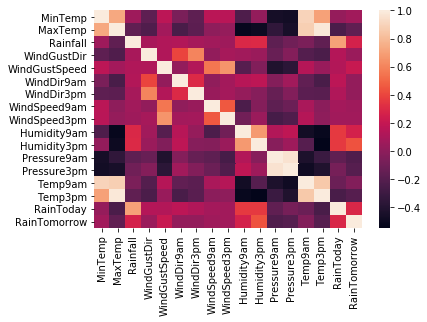

In [17]:
#Далее можно проводить корреляционный анализ (Методом Пирсона)
data.corr()
sns.heatmap(data.corr())

<h5>Проанализируем корреляционную матрицу.
Погода на завтрашний день коррелирует с Humidity3pm (44,2), это нам позволит произвести анализ. <br>
Так же слабо коррелирует с RainToday(29) и Rainfall(27), а так же WindGustSpeed(21), Pressure9am (-22) <br>
Чтобы уменьшить данные для рассчета, уберем данные до |20|<h5>

In [18]:
data = data.drop(columns=['MinTemp','MaxTemp','WindGustDir','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Temp9am','Temp3pm'],axis=1)

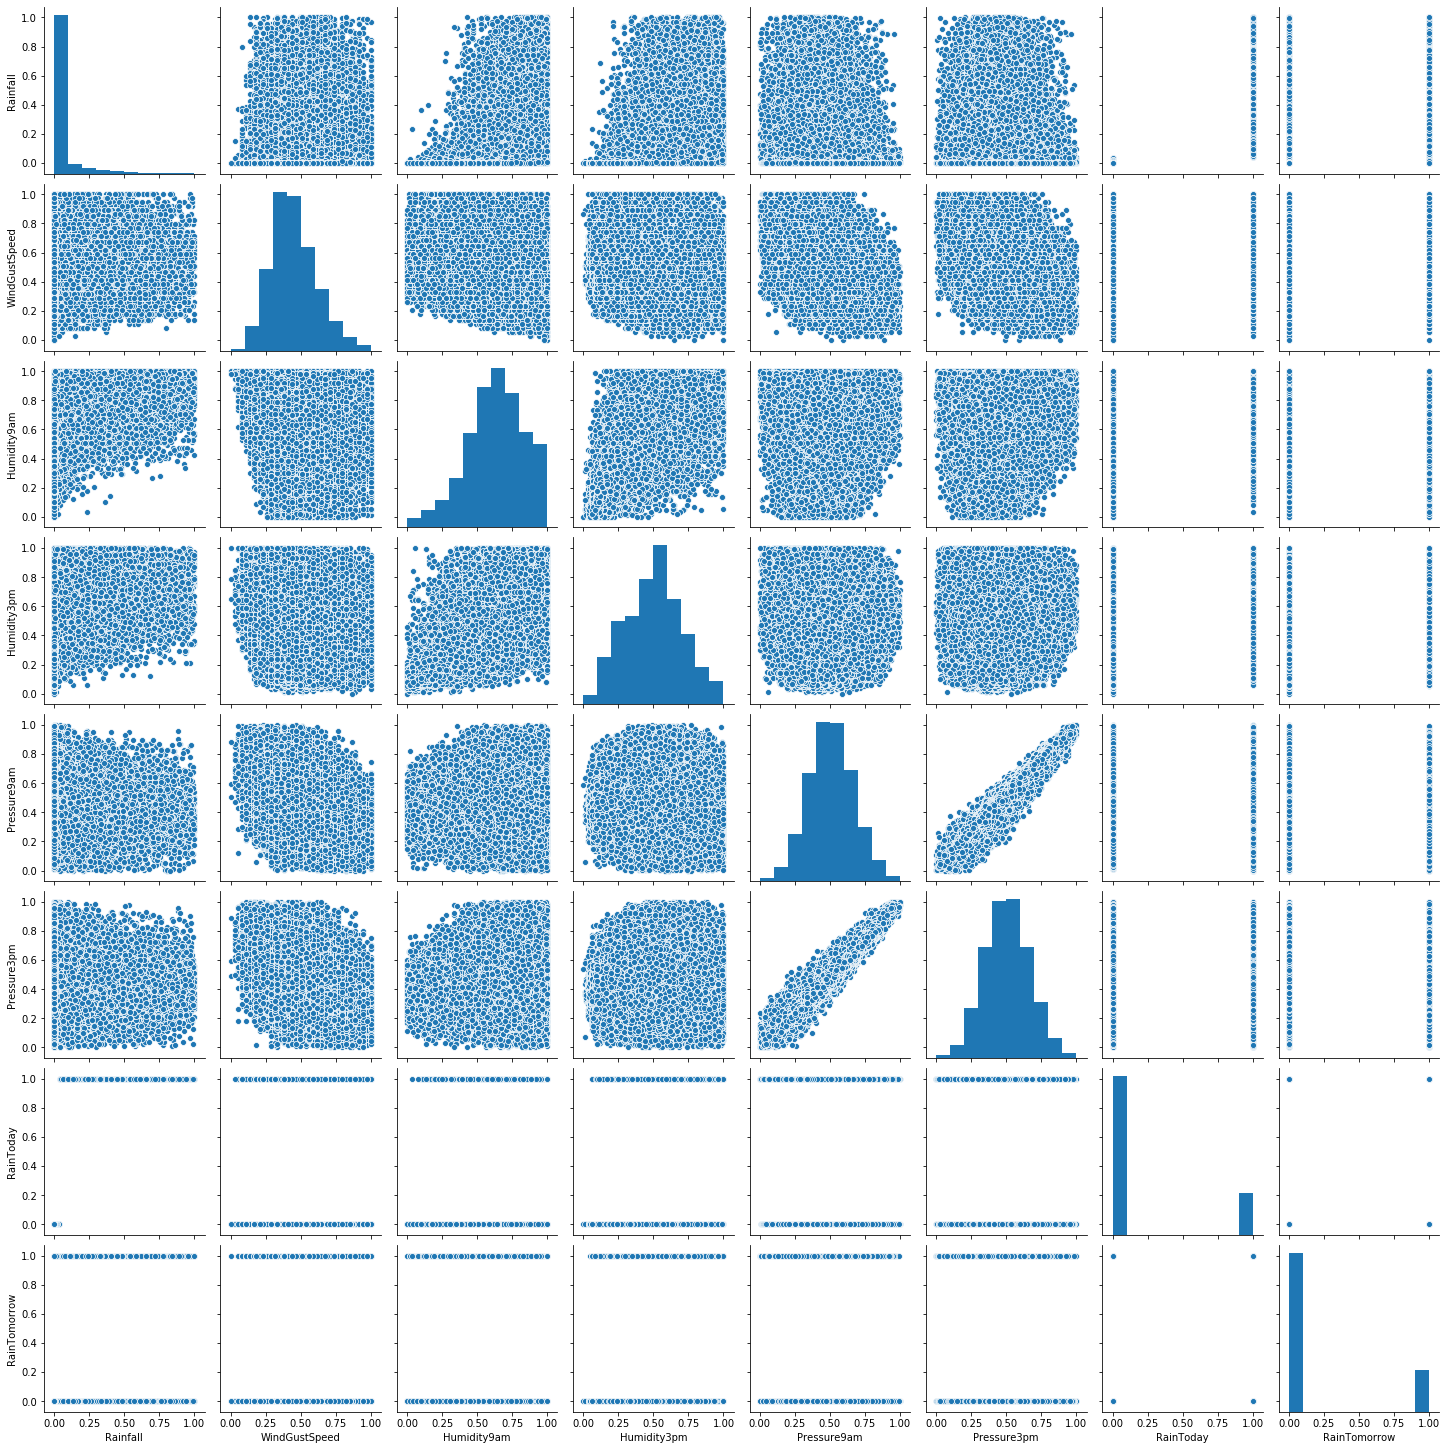

In [19]:
#Рассмотрим парные графики
sns.pairplot(data)

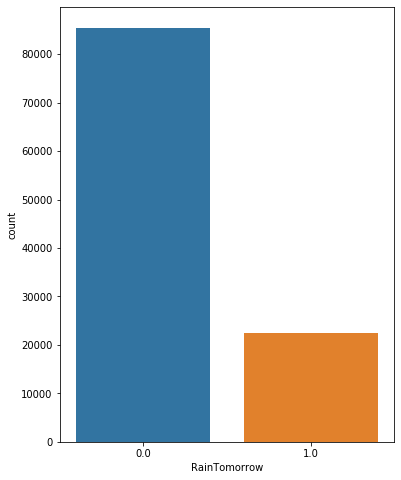

In [20]:
#Посмотрим на частоту дождей в нашем датасете
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=data)
plt.show()
#Дизбаланс присутствует, но строить можно

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Humidity3pm')

Text(0, 0.5, 'RainTomorrow')

Text(0.5, 0, 'RainToday')

Text(0, 0.5, 'RainTomorrow')

Text(0.5, 0, 'Rainfall')

Text(0, 0.5, 'RainTomorrow')

Text(0.5, 0, 'Pressure9am')

Text(0, 0.5, 'RainTomorrow')

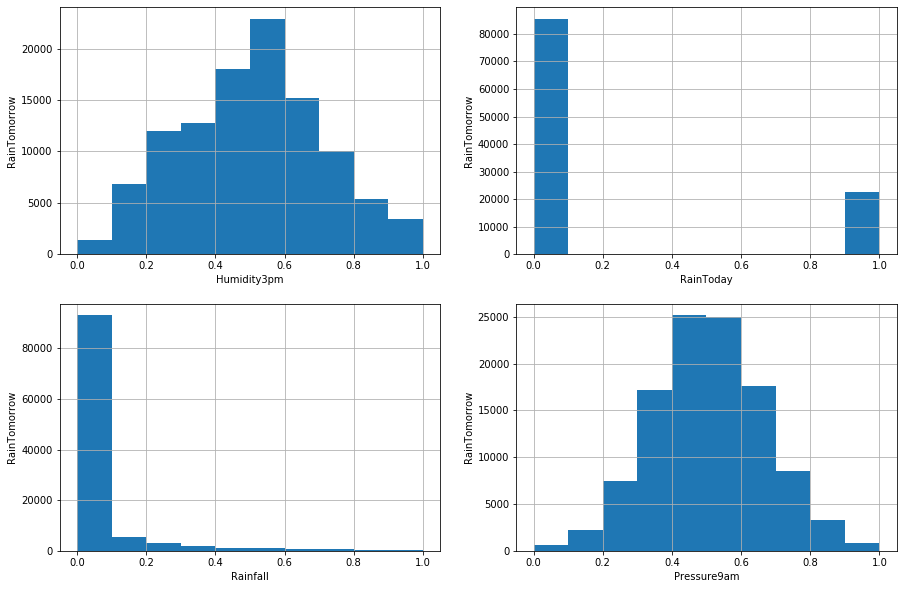

In [21]:
# Посмотрим некоторые зависимости
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Humidity3pm.hist(bins=10)
fig.set_xlabel('Humidity3pm')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.RainToday.hist(bins=10)
fig.set_xlabel('RainToday')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = data.Pressure9am.hist(bins=10)
fig.set_xlabel('Pressure9am')
fig.set_ylabel('RainTomorrow')
#Можно заметить зависимости в параметрах

<h3>5. Далее выберем метрики для оценки наших моделей.<br>
Выберем метрики accuracy<br>
(Метрика вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов.)<br>
recall<br>
(Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.)<br>
precision.<br>
(Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.)<br>
Данные метрики позволят определить точность прогноза, а так же проверить, в каких ситуациях программа дает ложные ответы<h3>

In [22]:
class Metrics:
    def __init__(self):
        self.df=pd.DataFrame(
            {'metric':pd.Series([], dtype='str'),
             'alg':pd.Series([], dtype='str'),
             'value':pd.Series([], dtype='float')})
        
    def setv(self, metric, alg, value):
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace=True)
        temp= [{'metric':metric, 'alg':alg, 'value':value}]
        self.df=self.df.append(temp, ignore_index=True)
        
    def getv(self, metric, ascending='True'):
        temp_data=self.df[self.df['metric']==metric]
        temp_data_2= temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5,5)):
        array_labels, array_metric = self.getv(metric,ascending)
        fix, ax1 = plt.subplots(figsize=figsize)
        pos=np.arange(len(array_metric))
        rects = ax1.barh (pos, array_metric,
                         align='center',
                         height=0.5,
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)),color='white')
        plt.show()
    

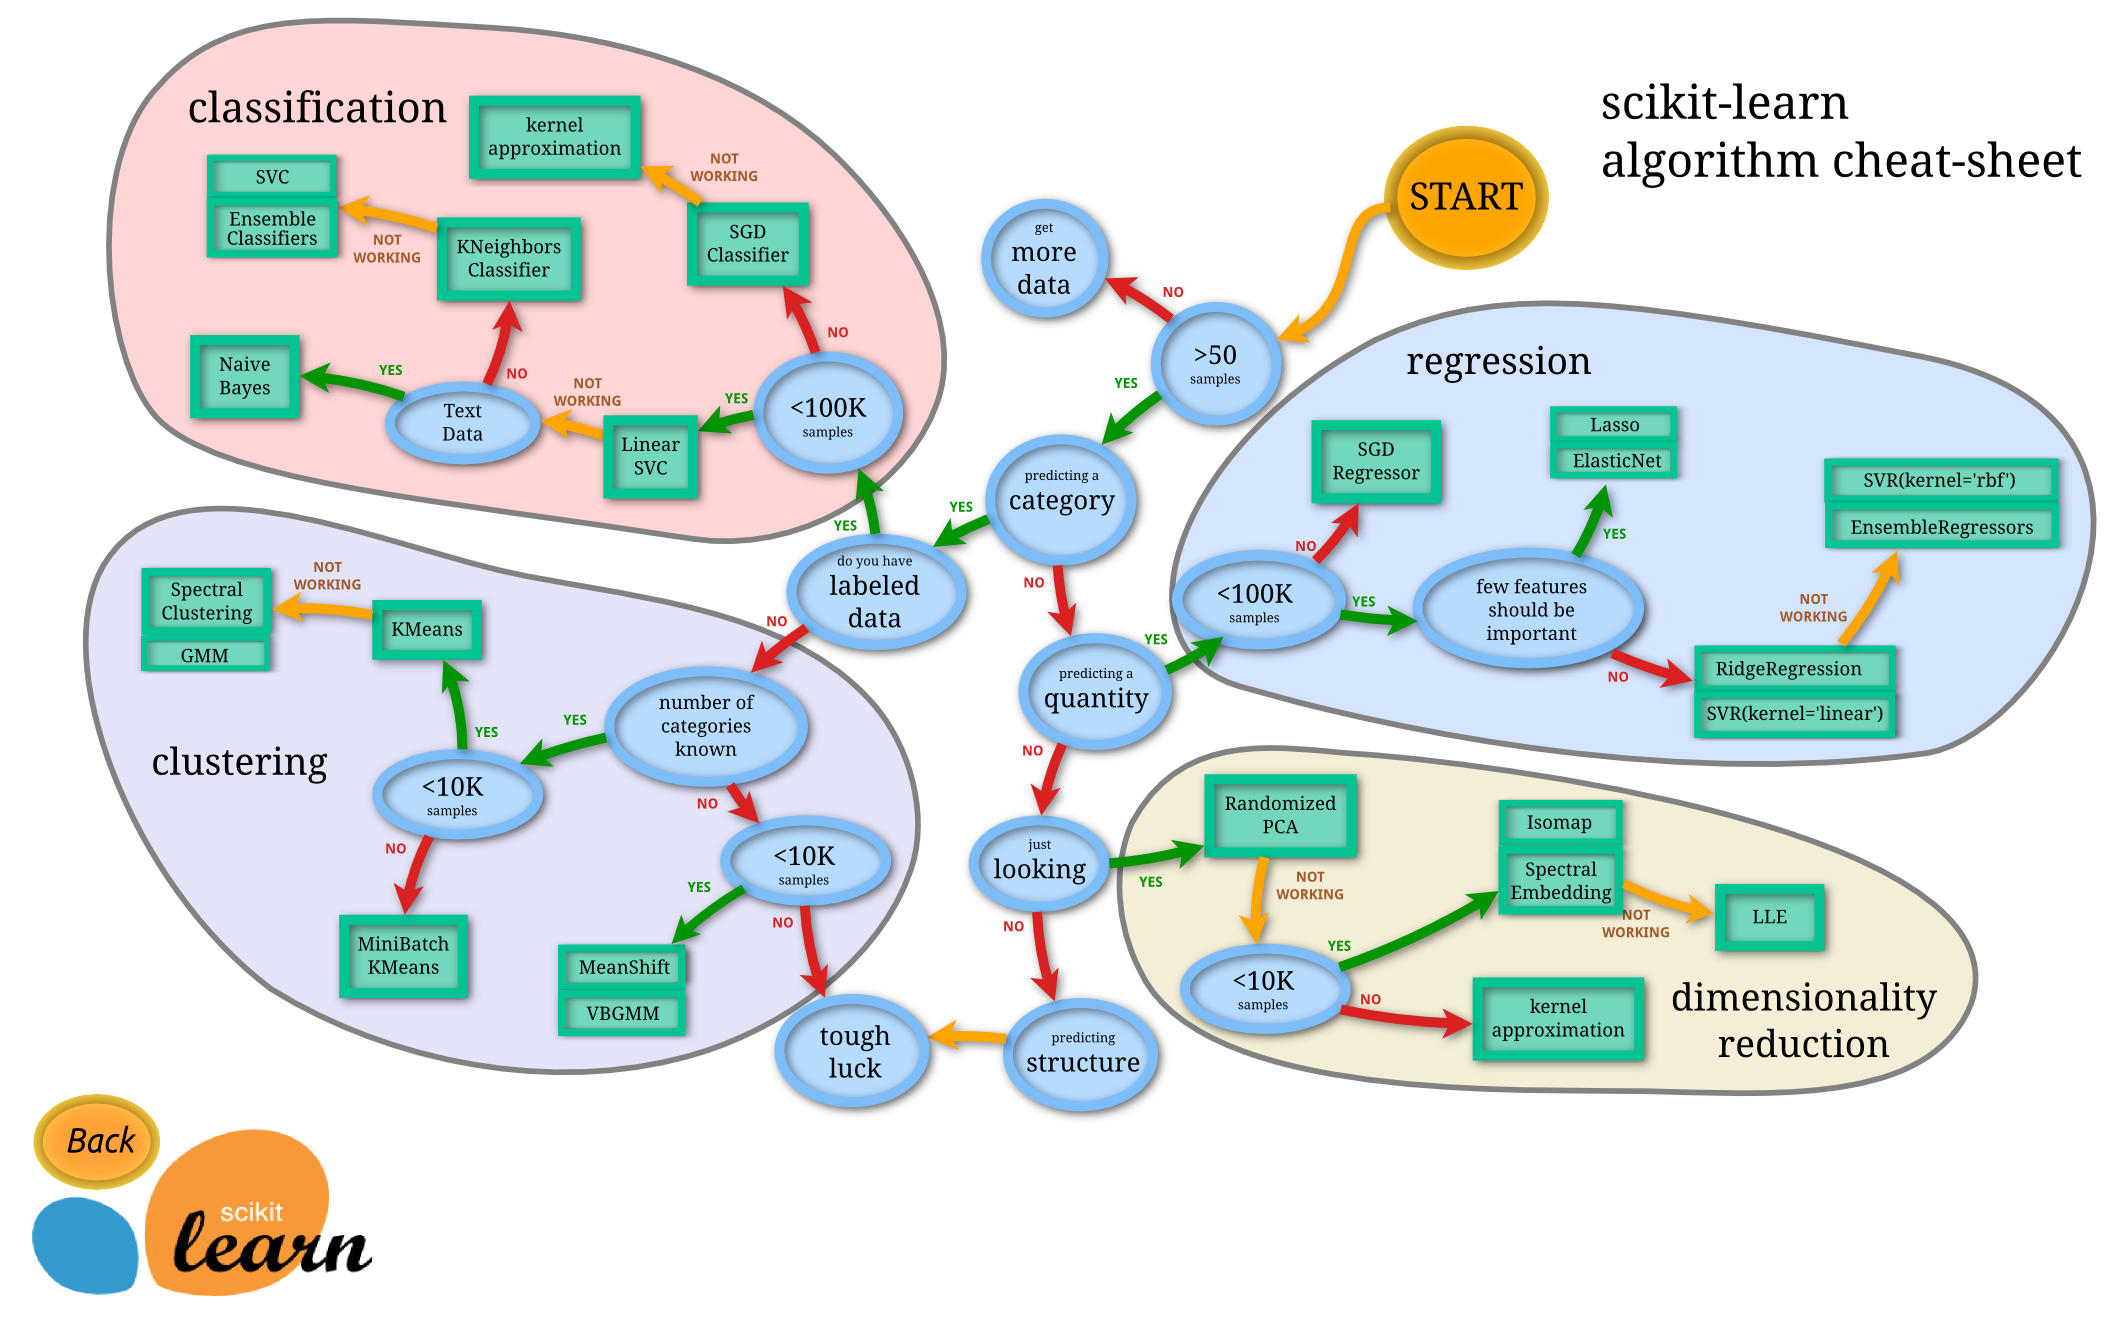

(107868, 8)

In [23]:
#6. Для подбора моделей для решения задач классификации и регрессии воспользуемся картой методов
Image("ml_map.png")
#Источник - https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
data.shape
#Даже несмотря на то, что количество данных превышает 100 000, можно использовать методы >100к, так как наше количество данных не сильно превышает это значение
#Задача с дождем требует решение задачи классификации, поэтому будем выбирать методы классификации.

<h3>6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.</h3>
<h5>Выберем методы KNeighbors<br>
DecisionTreeClassifier<br>
LinearSVC<br>
XGBoost <br>
Bagging<br>
 Данные методы являются относительно быстрыми, а так же помогают получить решение разными методами.</h5>

<h3>7. Формирование обучающей и тестовой выборки <br>
В данном примере разделим 70 к 30<h3>

In [24]:


features = data.drop(['RainTomorrow'], axis=1)
target_tmp = data['RainTomorrow']
target = pd.DataFrame({'RainTomorrow':target_tmp.index, 'RainTomorrow':target_tmp.values})
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=1)
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape


(75507, 7)

(32361, 7)

(75507, 1)

(32361, 1)

<h3>8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки<br> 
 и оценка качества моделей на основе тестовой выборки.<h3>

In [92]:
metric_logger = Metrics() #Запускаем класс логирования
def get_score(name,model,prediction):
    accuracy= accuracy_score(Y_test, prediction)
    precision= precision_score(Y_test, prediction)
    recall= recall_score(Y_test, prediction)
    print("accuracy_score: ", accuracy)
    print("precision_score: ", precision)
    print("recall_score: ", recall)
    metric_logger.setv("accuracy_score", name, accuracy)
    metric_logger.setv("precision_score", name, precision)
    metric_logger.setv("recall", name, recall)


<h4> KNeighbors <h4>

In [93]:
cl0_0 = KNeighborsClassifier().fit(X_train, Y_train)
target0_0 = cl0_0.predict(X_test)
cl0_0
target0_0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
get_score('KNeighbors_base',cl0_0,target0_0)

accuracy_score:  0.8342758258397454
precision_score:  0.6410517733387688
recall_score:  0.46613309619089965


<h4> DecisionTreeClassifier <h4>

In [95]:
cl1_0 = DecisionTreeClassifier(max_depth=None).fit(X_train, Y_train)
target1_0 = cl1_0.predict(X_test)
cl1_0
target1_0


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

array([0., 0., 0., ..., 0., 1., 0.])

In [96]:
get_score('Decision_base',cl1_0,target1_0)

accuracy_score:  0.7773554587311888
precision_score:  0.4681236080178174
recall_score:  0.49844375277901287


<h4> LinearSVC<h4>

In [97]:
cl2_0 = LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000, ).fit(X_train, Y_train)
target2_0 = cl2_0.predict(X_test)
cl2_0
target2_0


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

array([0., 0., 0., ..., 0., 0., 0.])

In [98]:
get_score('Linear_base',cl2_0,target2_0)

accuracy_score:  0.8468526930564568
precision_score:  0.7234839031694534
recall_score:  0.4296724470134875


<h4>XGBoost

In [99]:
cl3_0 = XGBClassifier().fit(X_train, Y_train)
target3_0 = cl3_0.predict(X_test)
cl3_0
target3_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

array([1., 0., 0., ..., 0., 0., 0.])

In [100]:
get_score('XGBoost_base',cl3_0,target3_0)

accuracy_score:  0.8501282407836593
precision_score:  0.7269681742043551
recall_score:  0.4502741959389358


<h4>Bagging

In [101]:
cl4_0 = BaggingClassifier().fit(X_train, Y_train)
target4_0 = cl4_0.predict(X_test)
cl4_0
target4_0

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

array([1., 0., 0., ..., 0., 0., 0.])

In [102]:
get_score('Bagging_base',cl4_0,target4_0)

accuracy_score:  0.8348629523191496
precision_score:  0.6559235385641253
recall_score:  0.4373795761078998


<h3> 9. Подбор гиперпараметров для выбранных моделей. <h3>

<h4> KNeighbors <h4>

In [38]:
%%time

n_range = np.array(range(5,80,5))
tuned_parameters = [{'n_neighbors': n_range}]
print (tuned_parameters)
optimazer_0 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv = 5).fit(X_train, Y_train)
print (optimazer_0.best_score_)
print (optimazer_0.best_params_)

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])}]
0.8505966127461487
{'n_neighbors': 55}
Wall time: 3min 2s


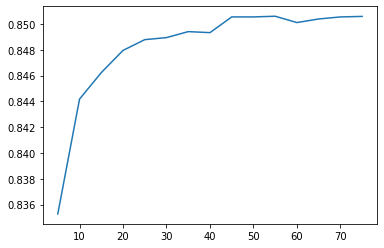

In [39]:
y_range=np.array(optimazer_0.cv_results_['mean_test_score'])
plt.plot(n_range, y_range)


<h4> DecisionTreeClassifier <h4>

In [40]:
%%time

n_range1 = np.array(range(1,70,1))
tuned_parameters1 = [{'max_depth': n_range1}]
optimazer_1 = GridSearchCV(DecisionTreeClassifier(), tuned_parameters1, cv = 5).fit(X_train, Y_train)
print (optimazer_1.best_score_)
print (optimazer_1.best_params_)

0.8484511234910908
{'max_depth': 7}
Wall time: 1min 14s


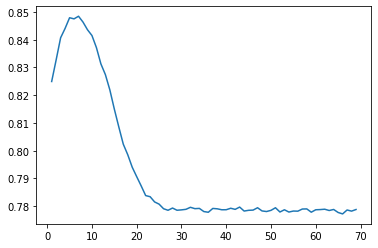

In [41]:
y_range1=np.array(optimazer_1.cv_results_['mean_test_score'])
plt.plot(n_range1, y_range1)

<h4> LinearSVC<h4>

In [42]:
%%time

n_range2 = np.arange(0.01, 1.5, 0.05)
tuned_parameters2 = [{'C': n_range2}]
#tuned_parameters2_1 = [{'tol': n_range2_1}]
optimazer_2 = GridSearchCV(LinearSVC(), tuned_parameters2, cv = 5).fit(X_train, Y_train)
print (optimazer_2.best_score_)
print (optimazer_2.best_params_)

0.8481200371302922
{'C': 0.060000000000000005}
Wall time: 1min 16s


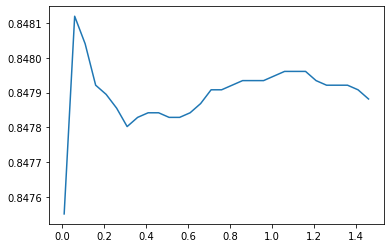

In [43]:
y_range2=np.array(optimazer_2.cv_results_['mean_test_score'])
plt.plot(n_range2, y_range2)

<h4>XGBoost

In [46]:
%%time


n_estimators = [50, 100, 150,200]
max_depth = [2, 4, 6, 8]
learning_rate = [0.01, 0.1, 0.2, 0.3]
tuned_parameters3 = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)

optimazer_3 = GridSearchCV(XGBClassifier(), tuned_parameters3, cv = 5).fit(X_train, Y_train)

print (optimazer_3.best_score_)
print (optimazer_3.best_params_)




0.8534970495884371
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
Wall time: 7min 53s


<h4>Bagging

In [79]:
%%time
n_estimators4 = [20, 50, 100, 150, 200, 250]
tuned_parameters4 = [{'n_estimators': n_estimators4}]
optimazer_4 = GridSearchCV(BaggingClassifier(), tuned_parameters4, cv = 5).fit(X_train, Y_train)
print (optimazer_4.best_score_)
print (optimazer_4.best_params_)

0.8465970565332437
{'n_estimators': 150}
Wall time: 10min 12s


{'mean_fit_time': array([ 2.98426495,  7.43318563, 14.70793104, 22.3578207 , 29.63506942,
        37.49967551]),
 'std_fit_time': array([0.01650521, 0.10839975, 0.07365965, 0.32386518, 0.14507162,
        0.16221087]),
 'mean_score_time': array([0.05731988, 0.13566203, 0.25181651, 0.39578795, 0.51671667,
        0.65255136]),
 'std_score_time': array([0.00413133, 0.00723669, 0.00344248, 0.02111377, 0.00736743,
        0.01229125]),
 'param_n_estimators': masked_array(data=[20, 50, 100, 150, 200, 250],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 150},
  {'n_estimators': 200},
  {'n_estimators': 250}],
 'split0_test_score': array([0.84227255, 0.84346444, 0.84253741, 0.84412661, 0.84326579,
        0.84406039]),
 'split1_test_score': array([0.8416766 , 0.8453185 , 0.84684148, 0.84511985, 0.84631175,
        0.84730499]

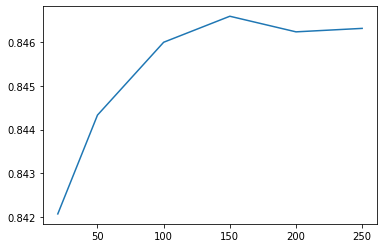

In [83]:
optimazer_4.cv_results_
y_range4=np.array(optimazer_4.cv_results_['mean_test_score'])
plt.plot(n_estimators4, y_range4)

<h3>10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.<h3>

<h4> KNeighbors <h4>

In [103]:
%%time
cl0_1 = KNeighborsClassifier(n_neighbors=55).fit(X_train, Y_train)
target0_1 = cl0_1.predict(X_test)


Wall time: 5.03 s


In [104]:
print('База:')
get_score('KNeighbors_base',cl0_0,target0_0)
print('Новые данные:')
get_score('KNeighbors_grid',cl0_1,target0_1)
#Несмотря на то, что основным параметром для поиска оптимальных гиперпараметров был accuracy_score, такой гиперпараметр заметно улучшил 
#precision_score, но с уменьшением recall

База:
accuracy_score:  0.8342758258397454
precision_score:  0.6410517733387688
recall_score:  0.46613309619089965
Новые данные:
accuracy_score:  0.847254411173944
precision_score:  0.7217305801376598
recall_score:  0.43515636579220396


<h4> DecisionTreeClassifier <h4>

In [105]:
cl1_1 = DecisionTreeClassifier(max_depth=7).fit(X_train, Y_train)
target1_1 = cl1_1.predict(X_test)


In [106]:
print('База:')
get_score('Decision_base',cl1_0,target1_0)
print('Новые данные:')
get_score('Decision_grid',cl1_1,target1_1)
#Можно заметить, насколько сильно улучшились параметры, даже несмотря на достатоно низкую (по сравнению с ближайшими соседями) скорость перебора.

База:
accuracy_score:  0.7773554587311888
precision_score:  0.4681236080178174
recall_score:  0.49844375277901287
Новые данные:
accuracy_score:  0.8455239331293841
precision_score:  0.738928376161837
recall_score:  0.40062249888839485


<h4> LinearSVC<h4>

In [107]:
cl2_1 = LinearSVC(C=0.06).fit(X_train, Y_train)
target2_1 = cl2_1.predict(X_test)


In [108]:
print('База:')
get_score('Linear_base',cl2_0,target2_0)
print('Новые данные:')
get_score('Linear_grid',cl2_1,target2_1)
#Как мы видим, новые параметры не сильно отличаются от исходных

База:
accuracy_score:  0.8468526930564568
precision_score:  0.7234839031694534
recall_score:  0.4296724470134875
Новые данные:
accuracy_score:  0.847254411173944
precision_score:  0.727547931382442
recall_score:  0.4274492366977916


<h4>XGBoost

In [109]:
cl3_1 = XGBClassifier(learning_rate = 0.1, max_depth= 4, n_estimators=150).fit(X_train, Y_train)
target3_1 = cl3_1.predict(X_test)

In [110]:
print('База:')
get_score('XGBoost_base',cl3_0,target3_0)
print('Новые данные:')
get_score('XGBoost_grid',cl3_1,target3_1)
#Как мы видим, новые параметры не сильно отличаются от исходных

База:
accuracy_score:  0.8501282407836593
precision_score:  0.7269681742043551
recall_score:  0.4502741959389358
Новые данные:
accuracy_score:  0.8506844658694107
precision_score:  0.7234539089848308
recall_score:  0.45946346524381204


<h4>Bagging

In [111]:
cl4_1 = BaggingClassifier(n_estimators= 150).fit(X_train, Y_train)
target4_1 = cl4_1.predict(X_test)

In [112]:
print('База:')
get_score('Bagging_base',cl4_0,target4_0)
print('Новые данные:')
get_score('Bagging_grid',cl4_1,target4_1)
#Как мы видим, новые параметры не сильно отличаются от исходных

База:
accuracy_score:  0.8348629523191496
precision_score:  0.6559235385641253
recall_score:  0.4373795761078998
Новые данные:
accuracy_score:  0.8428355118815859
precision_score:  0.6774951912801881
recall_score:  0.46983844671705943


<h3>11. Изучение качества

In [113]:
class_metrics = metric_logger.df['metric'].unique()
class_metrics

array(['accuracy_score', 'precision_score', 'recall'], dtype=object)

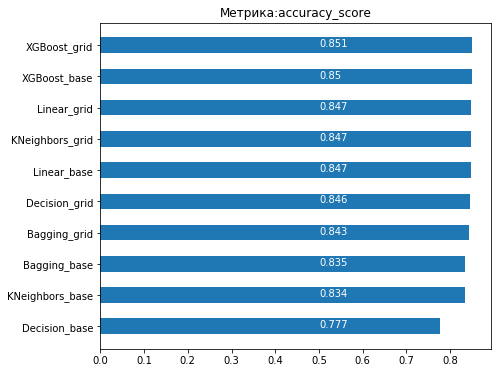

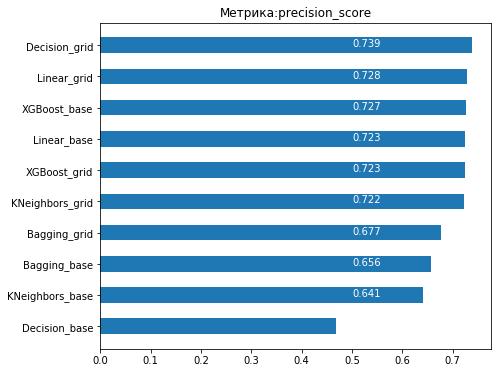

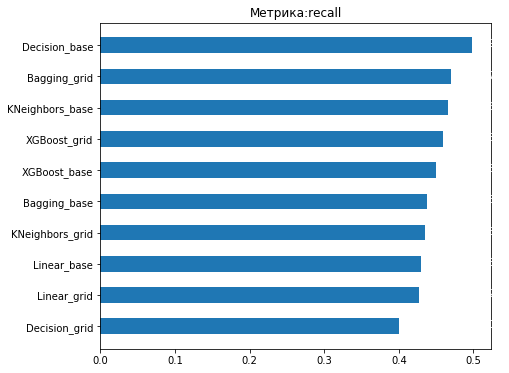

In [114]:
for metric in class_metrics:
    metric_logger.plot('Метрика:' + metric,metric, figsize=(7,6))

<h3>Выводы: </h3><br>
<h4>Как можно заметить, все методы неплохо справились с задачей. Из общей тенденции выходит только DecisionTreeClassifier. <br>
В базовом виде она дает лучше метрику Recall, однако сильно уступает всем методам в precision_score и accuracy_score <br>
Так же можно заметить, что те метрики, которые лучше  в recall, зачастую уступают в метрике precision_score.<br>
Лучшей метрикой все-таки буду считать XGBoost с параметрами learning_rate = 0.1, max_depth= 4, n_estimators=150, поскольку такой метод <br>
хорошо проявляет себя во всех метриках.
 
</h4>

1. Глава про метод опорных вектором, помогла разобраться с параметрами LinearSVC<br>
http://www.williamspublishing.com/PDF/978-5-9500296-2-2/part.pdf <br>
2. Градиентный бустинг<br>
https://neurohive.io/ru/osnovy-data-science/gradientyj-busting/<br>
3. XGBOOST (eXtreme Gradient Boosting) Работает быстрее (и эффективнее) sklearn бустинга<br>
https://github.com/dmlc/xgboost<br>
4. Параметры XGBoost<br>
https://xgboost.readthedocs.io/en/latest/parameter.html<br>
5. МГУА<br>
http://www.machinelearning.ru/wiki/images/6/65/DM_L3-2_part1.pdf<br>
<br>
<br>
<br>
<br>
<br>
<br>
AdaBoost для сдачи<br>
https://neerc.ifmo.ru/wiki/index.php?title=%D0%91%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3,_AdaBoost<br>

